# Adding custom marker to matplotlib plots

In [37]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
# !!pip install svgpath2mpl matplotlib
# !pip install svgpath2mpl
# !pip install svgpathtools
from svgpath2mpl import parse_path
from svgpathtools import svg2paths
from svgpath2mpl import parse_path

In [38]:
# 1. Select image from Figma
# 2. Copy as SVG
# 3. Take path d from svg and put in parse_path function
marker = parse_path("""M13 9L1 21M13.0335 8.96647C11.2111 7.14406 11.2111 4.18929 13.0335 2.36684C14.856 0.544388 17.8107 0.544388 19.6331 2.36684C21.4556 4.18929 21.4556 7.14406 19.6331 8.96647C17.8107 10.789 14.856 10.789 13.0335 8.96647Z""")
marker.vertices -= marker.vertices.mean(axis=0)
marker = marker.transformed(mpl.transforms.Affine2D().rotate_deg(135+180))
marker = marker.transformed(mpl.transforms.Affine2D().scale(-1,1))

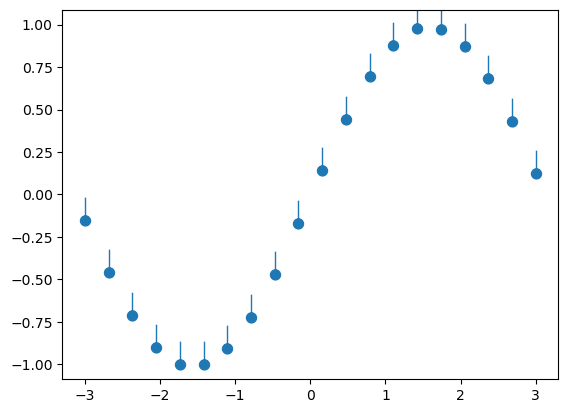

In [39]:
x = np.linspace(-3, 3, 20)       
# Choose marker size as number's exponent to 2 (30**2=900)
plt.scatter(x, np.sin(x), marker=marker, s=900)
plt.show()

# Rotate each data point's marker

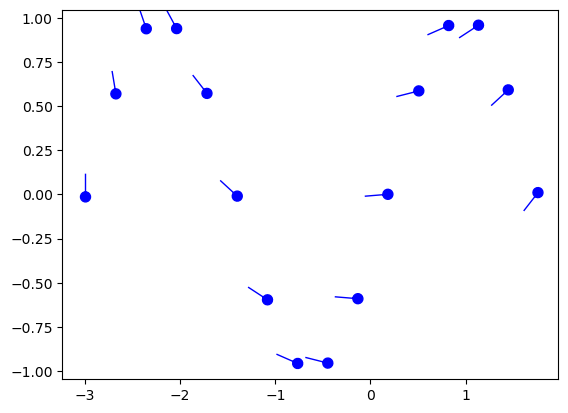

In [40]:
angle = np.linspace(0, 180, len(x))       

for x_, y_, angle_ in zip(x, y, angle):
    # make a markerstyle class instance and modify its transform prop
    t = mpl.markers.MarkerStyle(marker=marker)
    t._transform = t.get_transform().rotate_deg(angle_)
    plt.scatter(x_, y_, marker=t, s=900, color='blue')